In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
x= pd.read_csv('train.csv')
y= x.pop('Survived')

In [4]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
x['Age'].fillna(x['Age'].mean(), inplace= True)

In [6]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
numeric_variables= list(x.dtypes[x.dtypes != 'object'].index)

In [9]:
x[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [10]:
model= RandomForestRegressor(n_estimators= 100, oob_score= True, random_state=42)
model.fit(x[numeric_variables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [11]:
model.oob_score_

0.1361695005913669

In [12]:
y_oob= model.oob_prediction_
print ('c-stat:', roc_auc_score(y, y_oob))

c-stat: 0.7399551550399983


In [13]:
y_oob

array([0.71111111, 0.72413793, 0.02325581, 0.47368421, 0.16666667,
       0.34146341, 0.64705882, 0.17647059, 0.52777778, 0.75609756,
       0.72222222, 0.29411765, 0.38709677, 0.625     , 0.87096774,
       0.46875   , 0.04444444, 0.78571429, 0.41304348, 0.24242424,
       0.88571429, 0.64102564, 0.35897436, 0.5       , 0.27777778,
       0.05128205, 0.88636364, 0.71428571, 0.46875   , 0.36842105,
       0.47368421, 0.23684211, 0.84090909, 0.67647059, 0.82051282,
       0.475     , 0.33333333, 0.225     , 0.18421053, 0.53191489,
       0.275     , 0.57777778, 0.11904762, 0.90625   , 0.36363636,
       0.0625    , 0.61764706, 0.62162162, 0.44186047, 0.16129032,
       0.25      , 0.70833333, 0.25      , 0.61290323, 0.36363636,
       0.4       , 0.66666667, 0.5       , 1.        , 0.13157895,
       0.33333333, 0.2       , 0.76923077, 0.21428571, 0.5       ,
       0.25      , 0.36842105, 0.33333333, 0.4516129 , 0.10526316,
       0.88888889, 0.13157895, 0.51351351, 0.23076923, 0.34146

In [14]:
def describe_cat(x):
    from IPython.display import display,HTML
    display (HTML(x[x.columns[x.dtypes == 'object']].describe().to_html()))

In [15]:
describe_cat(x)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mangan, Miss. Mary",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [16]:
 x.drop(['Name','Ticket','PassengerId'], axis = 1, inplace = True)

In [17]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'None'
    
x['Cabin']= x['Cabin'].apply(clean_cabin)

0      None
1         C
2      None
3         C
4      None
5      None
6         E
7      None
8      None
9      None
10        G
11        C
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21        D
22     None
23        A
24     None
25     None
26     None
27        C
28     None
29     None
       ... 
861    None
862       D
863    None
864    None
865    None
866    None
867       A
868    None
869    None
870    None
871       D
872       B
873    None
874    None
875    None
876    None
877    None
878    None
879       C
880    None
881    None
882    None
883    None
884    None
885    None
886    None
887       B
888    None
889       C
890    None
Name: Cabin, Length: 891, dtype: object

In [18]:
cat_var= ['Sex', 'Cabin','Embarked']
for i in cat_var:
    x[i].fillna('Missing', inplace = True)
    dummies= pd.get_dummies(x[i], prefix= i)
    x= pd.concat([x, dummies], axis=1)
    x.drop([i], axis= 1, inplace = True)

In [19]:
def printall(x, max_rows= 10):
    from IPython.display import display, HTML
    display (HTML(x.to_html(max_rows= max_rows)))
printall(x)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [20]:
model= RandomForestRegressor(100, oob_score= True, n_jobs = -1, random_state= 42)
model.fit(x,y)
print ('c-stat:', roc_auc_score(y, model.oob_prediction_))

c-stat: 0.8635211282608464


In [21]:
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

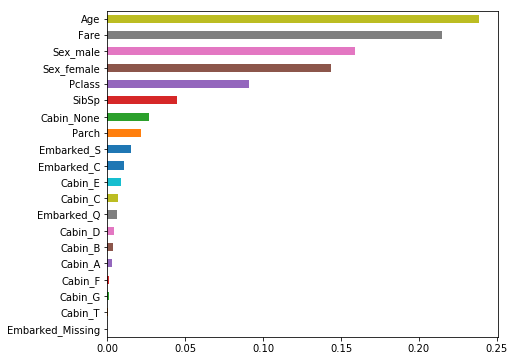

In [26]:
feature_importances = pd.Series(model.feature_importances_, index= x.columns)
feature_importances.sort_values(axis=0, ascending= True, inplace= True)
feature_importances.plot(kind='barh', figsize = (7,6))

In [24]:
%matplotlib inline

In [31]:
 def graph_feature_importances(model, feature_names, autoscale= True, headroom=0.05, width= 10, summarized_columns=None):
        if autoscale:
            x_scale = model.feature_importances_.max()+ headroom
        else:
            x_scale = 1
        feature_dict= dict(zip(feature_names, model.feature_importances_))
        if summarized_columns:
            for col_name in summarized_columns:
                sum_value =  sum(x for i, x in feature_dict.items() if col_name in i)
                keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
                for i in keys_to_remove:
                    feature_dict.pop(i)
                feature_dict[col_name]= sum_value
        results= pd.Series(feature_dict.values(), index= feature_dict.keys())
        results.sort_values(inplace= True)
        results.plot(kind='barh', figsize=(width, len(results)/4), xlim = (0, x_scale))
graph_feature_importances(model, x.columns, summarized_columns= cat_var)

TypeError: '<' not supported between instances of 'dict_values' and 'dict_values'

In [32]:
%%timeit
model= RandomForestRegressor(1000, oob_score= True, n_jobs= 1, random_state= 42)
model.fit(x,y)

2.66 s ± 53.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
model= RandomForestRegressor(1000, oob_score= True, n_jobs= -1, random_state= 42)
model.fit(x,y)

2.15 s ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


30 trees
c-stat: 0.8538704076524037

50 trees
c-stat: 0.8606983457429244

100 trees
c-stat: 0.8635211282608464

200 trees
c-stat: 0.8621922900755228

500 trees
c-stat: 0.863739494455629

1000 trees
c-stat: 0.8640430767264244

2000 trees
c-stat: 0.8634492271967107



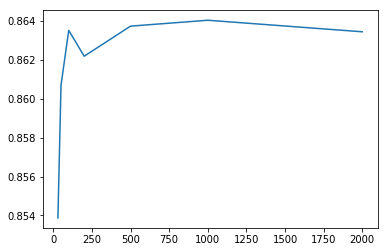

In [35]:
results= []
n_estimator_options =[30,50,100,200,500, 1000, 2000]
for trees in n_estimator_options:
    model= RandomForestRegressor(trees, oob_score= True, n_jobs= -1, random_state= 42)
    model.fit(x,y)
    print (trees, 'trees')
    roc= roc_auc_score(y, model.oob_prediction_)
    print ('c-stat:', roc)
    results.append(roc)
    print('')
pd.Series(results, n_estimator_options).plot();

auto option
c-stat: 0.8640430767264244

None option
c-stat: 0.8640430767264244

sqrt option
c-stat: 0.8633746631301995

log2 option
c-stat: 0.8633746631301995

0.9 option
c-stat: 0.8635344432727234

0.2 option
c-stat: 0.8633746631301995



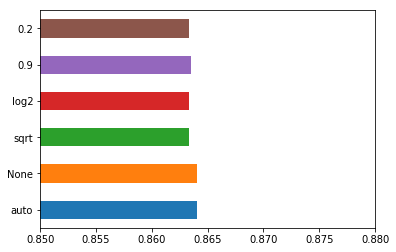

In [36]:
results= []
max_features_options =['auto', None, 'sqrt','log2',0.9,0.2]
for max_features in max_features_options:
    model= RandomForestRegressor(n_estimators= 1000, oob_score= True, n_jobs= -1, random_state= 42, max_features= max_features)
    model.fit(x,y)
    print (max_features, 'option')
    roc= roc_auc_score(y, model.oob_prediction_)
    print ('c-stat:', roc)
    results.append(roc)
    print('')
pd.Series(results, max_features_options).plot(kind= 'barh', xlim=(.85,.88));  

1 min samples
c-stat: 0.8640430767264244

2 min samples
c-stat: 0.8696540227313881

3 min samples
c-stat: 0.8715713844416749

4 min samples
c-stat: 0.87347809414246

5 min samples
c-stat: 0.8742690058479532

6 min samples
c-stat: 0.8740293356341673

7 min samples
c-stat: 0.8733049989880591

8 min samples
c-stat: 0.871866977705344

9 min samples
c-stat: 0.8692945174107096

10 min samples
c-stat: 0.8674304157479309



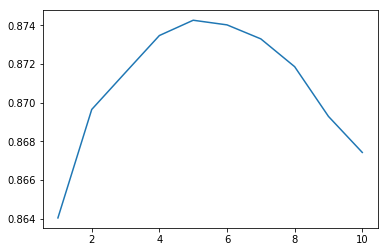

In [37]:
results= []
min_samples_leaf_options =[1,2,3,4,5,6,7,8,9,10]
for min_samples in min_samples_leaf_options:
    model= RandomForestRegressor(n_estimators= 1000, oob_score= True, n_jobs= -1, random_state= 42, max_features= 'auto',min_samples_leaf = min_samples)
    model.fit(x,y)
    print (min_samples, 'min samples')
    roc= roc_auc_score(y, model.oob_prediction_)
    print ('c-stat:', roc)
    results.append(roc)
    print('')
pd.Series(results, min_samples_leaf_options).plot();

In [38]:
model= RandomForestRegressor(n_estimators= 1000,oob_score= True, n_jobs= -1, random_state=42, max_features= 'auto', min_samples_leaf= 5)
model.fit(x,y)
roc= roc_auc_score(y, model.oob_prediction_)
print ('c-stat:', roc)

c-stat: 0.8742690058479532


In [39]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [40]:
test= pd.read_csv('test.csv')

In [49]:
#test.drop(['Name','Ticket','PassengerId'], axis= 1, inplace= True)
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
test['Age'].fillna(test['Age'].mean(), inplace= True)

In [51]:
test['Fare'].fillna(test['Age'].mean(), inplace= True)

In [52]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.614378
std,0.841838,12.634534,0.896760,0.981429,55.841115
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,7.8292,NaN,Q
1,3,female,47.00000,1,0,7.0000,NaN,S
2,2,male,62.00000,0,0,9.6875,NaN,Q
3,3,male,27.00000,0,0,8.6625,NaN,S
4,3,female,22.00000,1,1,12.2875,NaN,S
5,3,male,14.00000,0,0,9.2250,NaN,S
6,3,female,30.00000,0,0,7.6292,NaN,Q
7,2,male,26.00000,1,1,29.0000,NaN,S
8,3,female,18.00000,0,0,7.2292,NaN,C
9,3,male,21.00000,2,0,24.1500,NaN,S


In [54]:
test['Cabin']= test['Cabin'].apply(clean_cabin)

In [55]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,7.8292,None,Q
1,3,female,47.00000,1,0,7.0000,None,S
2,2,male,62.00000,0,0,9.6875,None,Q
3,3,male,27.00000,0,0,8.6625,None,S
4,3,female,22.00000,1,1,12.2875,None,S
5,3,male,14.00000,0,0,9.2250,None,S
6,3,female,30.00000,0,0,7.6292,None,Q
7,2,male,26.00000,1,1,29.0000,None,S
8,3,female,18.00000,0,0,7.2292,None,C
9,3,male,21.00000,2,0,24.1500,None,S


In [56]:
cat_var= ['Sex', 'Cabin','Embarked']
for i in cat_var:
    test[i].fillna('Missing', inplace = True)
    dummies= pd.get_dummies(test[i], prefix= i)
    test= pd.concat([test, dummies], axis=1)
    test.drop([i], axis= 1, inplace = True)

In [66]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [68]:
test['Cabin_T']= 0

In [70]:
test['Embarked_Missing']=0

In [71]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S,Cabin_T,Embarked_Missing
0,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [72]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [73]:
predictions= model.predict(test)

In [74]:
predictions

array([0.0950538 , 0.55600928, 0.14674474, 0.25031322, 0.47270644,
       0.15984815, 0.67354633, 0.10703075, 0.75272777, 0.09027201,
       0.05421077, 0.16956666, 0.99972115, 0.08904426, 0.99379949,
       0.9179996 , 0.14227941, 0.11419537, 0.63014253, 0.56781524,
       0.25174156, 0.58073918, 1.        , 0.26299197, 0.94676164,
       0.04390938, 0.99957143, 0.12312963, 0.54356655, 0.13596814,
       0.05143783, 0.07901432, 0.69860186, 0.43484422, 0.37801816,
       0.07724088, 0.44026171, 0.37591622, 0.09419453, 0.5015204 ,
       0.05520173, 0.5534862 , 0.10978405, 0.9706984 , 0.99423795,
       0.16735205, 0.30796481, 0.12450585, 0.97448687, 0.69969943,
       0.38913428, 0.1170313 , 0.93144949, 0.88231379, 0.12874404,
       0.1602909 , 0.03809649, 0.18819436, 0.10713771, 0.98914582,
       0.12365179, 0.22625036, 0.10642798, 0.78182209, 0.64722709,
       0.97925579, 0.70422454, 0.12048499, 0.4400153 , 0.88253707,
       0.72913536, 0.069267  , 0.6213565 , 0.55490523, 0.95485